Do you have lambda (mean) or n (sample size) and p (probability of success)? 
 1: lambda 
 2: n and p 
  1
Insert the lambda (mean):  2.55
Enter lower limit value:  0
Enter upper limit value:  6


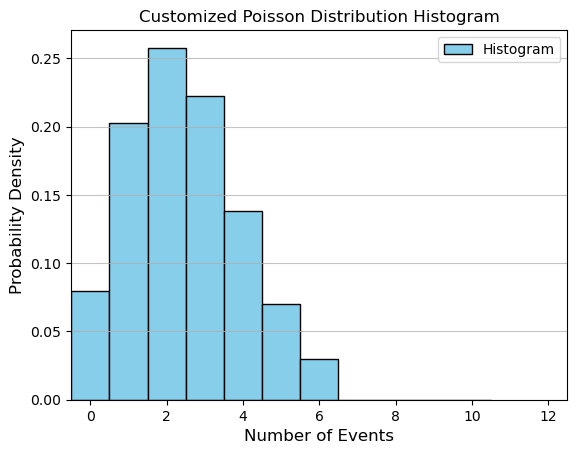

In [13]:
import numpy as np  # Importing NumPy for numerical operations.
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting histograms.
from scipy.stats import poisson  # Importing Poisson distribution from SciPy.

# Function to calculate and return the mean (lambda) for the Poisson distribution
def get_mean():
    while True:  # Loop to ensure valid input is provided by the user
        try:
            # Ask the user if they want to provide lambda directly or calculate it using n and p
            option = int(input('Do you have lambda (mean) or n (sample size) and p (probability of success)? \n 1: lambda \n 2: n and p \n '))
            
            if option == 1:  # If the user selects option 1
                # Ask the user to input the lambda value
                lambda_value = eval(input("Insert the lambda (mean): "))
                break  # Exit the loop after valid input
            elif option == 2:  # If the user selects option 2
                # Ask the user to input n (sample size) and p (probability of success)
                n = eval(input("Input n (sample size): "))
                p = eval(input("Input p (probability of success): "))
                # Calculate lambda as the product of n and p
                lambda_value = n * p
                print(lambda_value)  # Display the calculated lambda value
                break  # Exit the loop after valid input
            else:
                # If the user enters a number other than 1 or 2, display an error message
                print("Invalid input. Please enter 1 or 2.")
        except ValueError:
            # Catch invalid inputs (like non-numeric values) and prompt the user again
            print("Invalid input. Please enter a valid number.")

    # Check if the lambda value is within a reasonable range for Poisson modeling
    if lambda_value > 5 or lambda_value <= 0:
        print("This shouldn't be modeled with a Poisson distribution")  # Display error if lambda is invalid
        return None  # Return None if lambda is not suitable
    else:
        return lambda_value  # Return the valid lambda value

# Function to draw a histogram based on the Poisson distribution
def draw_hist(mean):
    if mean is None:  # If the mean is invalid, do not proceed further
        return

    while True:  # Loop until a valid lower limit is provided
        try:
            lower_limit = int(input('Enter lower limit value: '))
            if lower_limit < 0:  # Limits must be non-negative
                print("Invalid limit. Lower limit must be non-negative.")
                continue
            break  # Exit the loop after valid lower limit input
        except ValueError:
            print("Invalid input. Please enter a numerical value for the lower limit.")

    # Loop until a valid upper limit is provided
    while True:
        try:
            upper_limit = int(input('Enter upper limit value: '))
            if upper_limit < 0:  # Upper limit must be non-negative
                print("Invalid limit. Upper limit must be non-negative.")
                continue
            elif upper_limit <= lower_limit:  # Upper limit should be greater than lower limit
                print("Upper limit should be greater than the lower limit.")
                continue

            # Generate 1,000,000 random samples from the Poisson distribution with the given mean
            num_samples = 100000
            samples = poisson.rvs(mean, size=num_samples)

            # Filter the samples to include only those within the user-specified range
            samples_filtered = [a for a in samples if lower_limit <= a <= upper_limit]

            # Plot a histogram of the filtered samples
            plt.hist(
                samples_filtered,  # Data to plot
                bins=range(max(samples) + 2),  # Bin edges for the histogram
                align='left',  # Align bins to the left
                density=True,  # Normalize the histogram to show probabilities
                color='skyblue',  # Set the bar color
                edgecolor='black',  # Set the edge color of the bars
                label='Histogram'  # Add a label for the legend
            )
            
            # Add a title and labels to the plot
            plt.title('Customized Poisson Distribution Histogram', fontsize=12)
            plt.xlabel('Number of Events', fontsize=12)
            plt.ylabel('Probability Density', fontsize=12)
            plt.xticks(fontsize=10)  # Set the font size for x-axis ticks
            plt.yticks(fontsize=10)  # Set the font size for y-axis ticks
            plt.legend(fontsize=10)  # Display the legend with a specific font size
            plt.grid(axis='y', alpha=0.75)  # Add gridlines along the y-axis for better readability
            plt.xlim(-0.5, max(samples) + 0.5)  # Set the x-axis limits to display the histogram properly
            plt.show()  # Display the histogram
            break  # Exit the loop after successful plotting
        except ValueError:
            # Catch invalid inputs (like non-numeric values for limits) and display an error message
            print("Invalid input. Please enter a numerical value for the upper limit.")

# Call the get_mean function to calculate or retrieve the mean value
mean_value = get_mean()

# Call the draw_hist function to plot the histogram if the mean is valid
draw_hist(mean_value)

